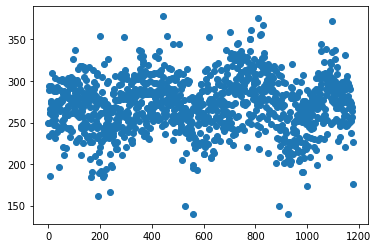

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Models
from sklearn.covariance import EllipticEnvelope

df = pd.read_csv('Output.csv', encoding='windows-1252')

df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')

x= df.values
plt.scatter(x[:, 0], x[:, 1])

In [2]:
clf = EllipticEnvelope(contamination=.15)
predictions = clf.fit_predict(x)
print("Anomaly point: ", (predictions < 0).mean())

Anomaly point:  0.1503823279524214


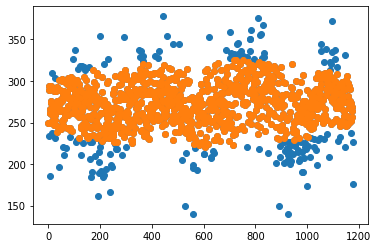

In [3]:
anomalies = np.where(predictions > 0)
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(x[anomalies, 0], x[anomalies, 1])